In [260]:
# Importing Libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report 


from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings("ignore")


In [78]:

HP_Train = pd.read_csv("C:/Users/sravy/OneDrive/Documents/MSISOM/Sample Practice  Proj/train.csv")
HP_Test = pd.read_csv("C:/Users/sravy/OneDrive/Documents/MSISOM/Sample Practice  Proj/test.csv")
     

In [79]:
HP_Train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [80]:
HP_Test.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


In [81]:

HP_Train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [82]:

HP_Test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [83]:
HP_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [84]:
HP_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [85]:
print("House Price prediction data -  rows:", HP_Train.shape[0]," columns:",  HP_Train.shape)

House Price prediction data -  rows: 1460  columns: (1460, 81)


In [86]:
print("House Price prediction data -  rows:", HP_Test.shape[0]," columns:",  HP_Test.shape)

House Price prediction data -  rows: 1459  columns: (1459, 80)


In [179]:
HP_data = [df_Train,df_Test]
HP_data_combined = pd.concat(HP_data).reset_index(drop=True)

HP_data_combined.head(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0


In [180]:
# Check for null data:

print(HP_data_combined.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64


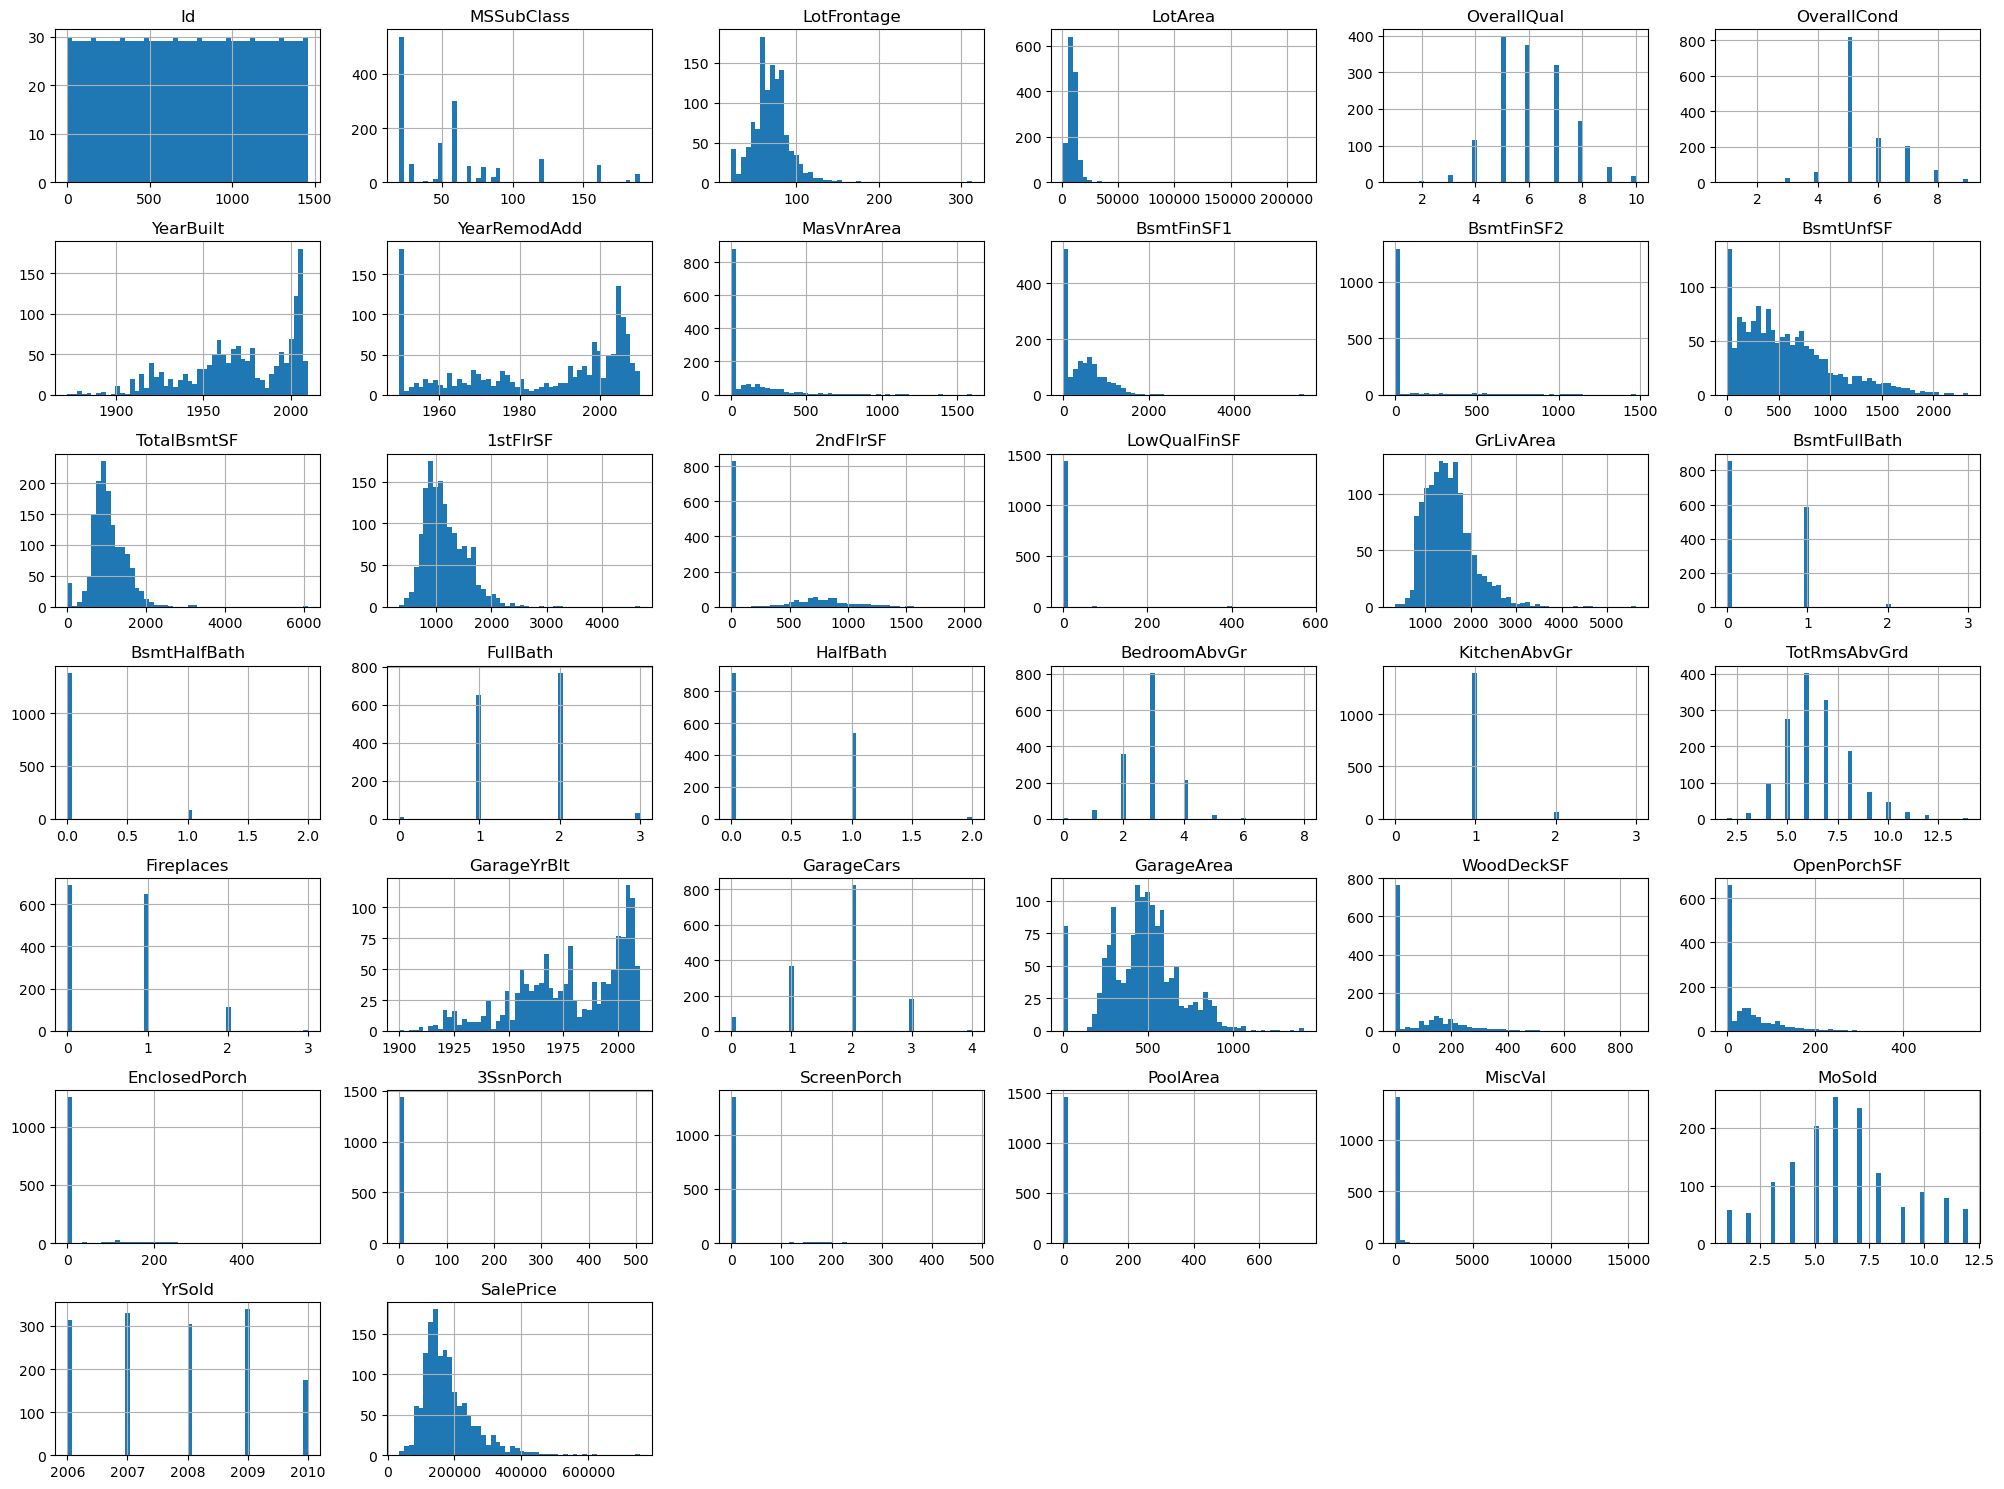

In [136]:

import matplotlib.pyplot as plt
HP_Train.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Heatmap of missing values'}>

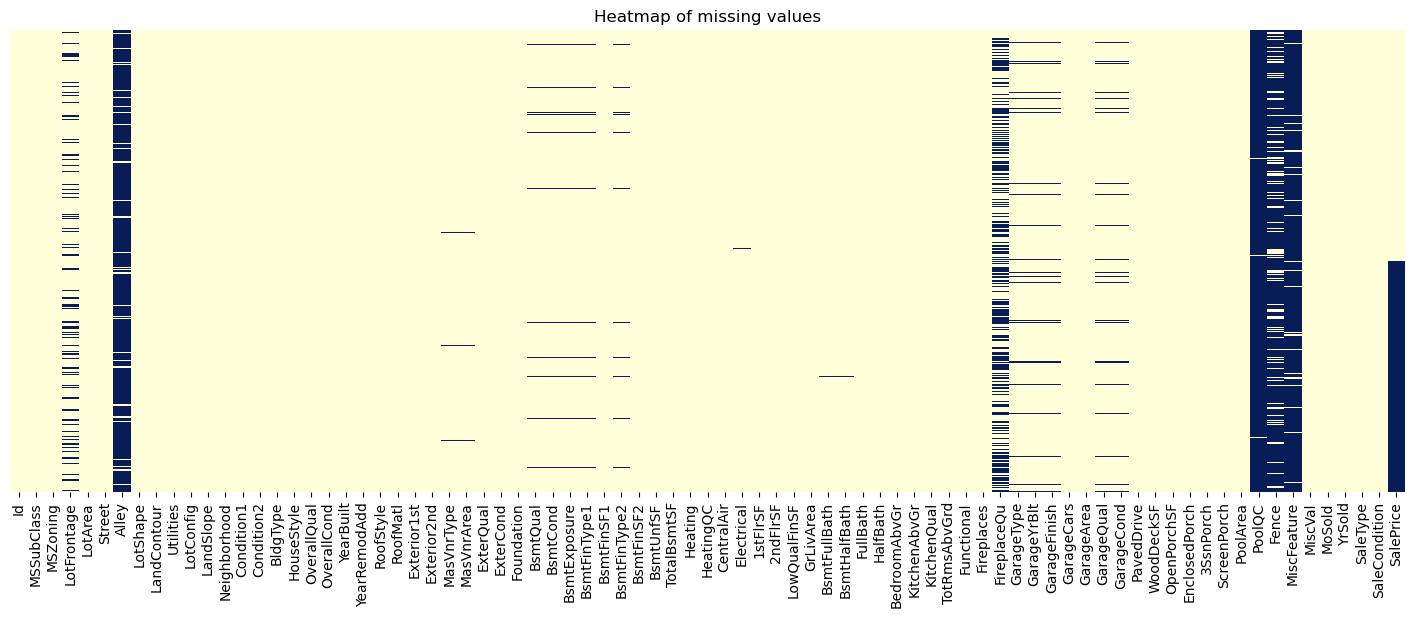

In [158]:
plt.figure(figsize=(18,6))
plt.title('Heatmap of missing values')
sns.heatmap(HP_data_combined.isnull(),yticklabels=False,cbar=False,cmap="YlGnBu")
     

In [181]:
a = (HP_Train.dtypes == 'object')
object_cols = list(a[a].index)
print("Categorical variables:")
print(object_cols)

a = (HP_Train.dtypes == 'int')
num_cols = list(a[a].index)
print("Integer variables:")
print(num_cols)

a = (HP_Train.dtypes == 'float')
num_cols = list(a[a].index)
print("Real variables:")
print(num_cols)

Categorical variables:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Integer variables:
[]
Real variables:
['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


<Axes: title={'center': 'No. Unique values of Categorical Features'}>

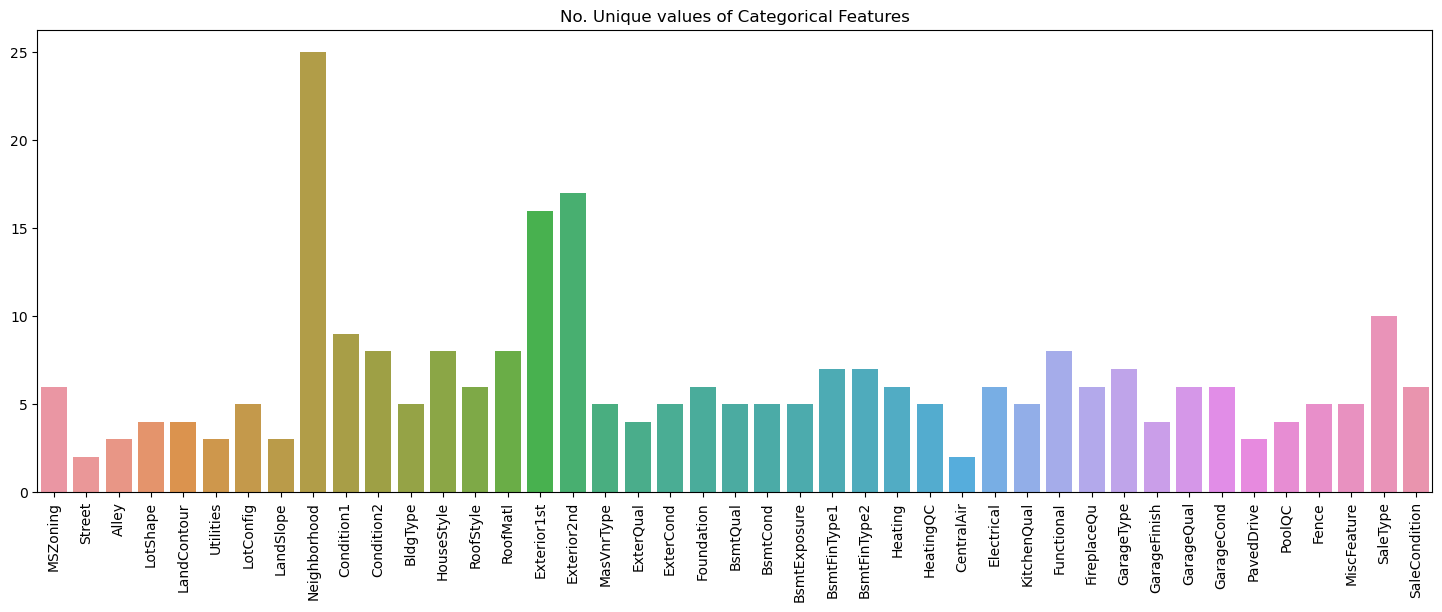

In [160]:

unique_values = []
for col in object_cols:
  unique_values.append(HP_data_combined[col].unique().size)
plt.figure(figsize=(18,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)
     

In [182]:
a = (HP_Test.dtypes == 'object')
object_cols = list(a[a].index)
print("Categorical variables:")
print(object_cols)

a = (HP_Test.dtypes == 'int')
num_cols = list(a[a].index)
print("Integer variables:")
print(num_cols)

a = (HP_Test.dtypes == 'float')
num_cols = list(a[a].index)
print("Real variables:")

print(num_cols)

Categorical variables:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Integer variables:
[]
Real variables:
['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']


In [140]:
HP_data_combined.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0


In [183]:


HP_data_combined['MSZoning'] = HP_data_combined['MSZoning'].fillna(HP_data_combined['MSZoning'].mode()[0])
HP_data_combined['LotFrontage'] = HP_data_combined['LotFrontage'].fillna(HP_data_combined['LotFrontage'].mean())
HP_data_combined.drop(columns='Alley',inplace=True); print('Drop Alley \n')


Drop Alley 



In [184]:
print(HP_data_combined['Utilities'].value_counts())
HP_data_combined.drop(columns='Utilities',inplace=True); print('Drop Utilities \n')

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64
Drop Utilities 



In [161]:
HP_data_combined['Exterior1st'] = HP_data_combined['Exterior1st'].fillna(HP_data_combined['Exterior1st'].mode()[0])
HP_data_combined['Exterior2nd'] = HP_data_combined['Exterior2nd'].fillna(HP_data_combined['Exterior2nd'].mode()[0])
HP_data_combined['MasVnrType'] = HP_data_combined['MasVnrType'].fillna(HP_data_combined['MasVnrType'].mode()[0])
HP_data_combined['MasVnrArea'] = HP_data_combined['MasVnrArea'].fillna(HP_data_combined['MasVnrArea'].mean())
HP_data_combined['Electrical'] = HP_data_combined['Electrical'].fillna(HP_data_combined['Electrical'].mode()[0])
HP_data_combined['KitchenQual'] = HP_data_combined['KitchenQual'].fillna(HP_data_combined['KitchenQual'].mode()[0])
HP_data_combined['Functional'] = HP_data_combined['Functional'].fillna(HP_data_combined['Functional'].mode()[0])

In [164]:
HP_data_combined['FireplaceQu'] = HP_data_combined['FireplaceQu'].fillna('NA')
HP_data_combined.loc[(HP_data_combined['PoolQC'].isnull()) & HP_data_combined['PoolArea']>0][['PoolQC','PoolArea']]
HP_data_combined.at[2599,'PoolQC'] = HP_data_combined['PoolQC'].mode()[0]; print('PoolQC: Use mode for missing value with non-zero PoolAre \n')
HP_data_combined['PoolQC'] = HP_data_combined['PoolQC'].fillna('NA'); print('PoolQC: Use NA for remaining missing values \n')

HP_data_combined['SaleType'].fillna(HP_data_combined['SaleType'].mode()[0],inplace=True)
HP_data_combined.drop(columns=['Fence','MiscFeature','SalePrice'],inplace=True); print('Drop Fence, MiscFeature and SalePrice\n')


PoolQC: Use mode for missing value with non-zero PoolAre 

PoolQC: Use NA for remaining missing values 

Drop Fence, MiscFeature and SalePrice



In [185]:
HP_data_combined['BsmtQual'] = HP_data_combined['BsmtQual'].fillna('NA')
HP_data_combined['BsmtCond'] = HP_data_combined['BsmtCond'].fillna('NA')
HP_data_combined['BsmtExposure'] = HP_data_combined['BsmtExposure'].fillna('NA')
HP_data_combined['BsmtFinType1'] = HP_data_combined['BsmtFinType1'].fillna('NA')
HP_data_combined['BsmtFinType2'] = HP_data_combined['BsmtFinType2'].fillna('NA')

HP_data_combined['BsmtFinSF1'] = HP_data_combined['BsmtFinSF1'].fillna(int(0))
HP_data_combined['BsmtFinSF2'] = HP_data_combined['BsmtFinSF2'].fillna(int(0))
HP_data_combined['BsmtUnfSF'] = HP_data_combined['BsmtUnfSF'].fillna(int(0))
HP_data_combined['TotalBsmtSF'] = HP_data_combined['TotalBsmtSF'].fillna(int(0))
HP_data_combined['BsmtFullBath'] = HP_data_combined['BsmtFullBath'].fillna(int(0))
HP_data_combined['BsmtHalfBath'] = HP_data_combined['BsmtHalfBath'].fillna(int(0))

HP_data_combined['GarageType'] = HP_data_combined['GarageType'].fillna('NA')
HP_data_combined['GarageFinish'] = HP_data_combined['GarageFinish'].fillna('NA')
HP_data_combined['GarageCond'] = HP_data_combined['GarageCond'].fillna('NA')
HP_data_combined['GarageQual'] = HP_data_combined['GarageQual'].fillna('NA')
HP_data_combined['GarageCars'] = HP_data_combined['GarageCars'].fillna(int(0))
HP_data_combined['GarageArea'] = HP_data_combined['GarageArea'].fillna(int(0))
HP_data_combined['GarageYrBlt'] = HP_data_combined['GarageYrBlt'].fillna(int(0))

In [231]:
HP_data_combined.drop(columns='Id',inplace=True)

HP_data_combined.head(2)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,5,3,41,619,1,3,3,4,0,5,...,0,3,4,4,0,1,2,8,4,412
1,0,3,57,895,1,3,3,2,0,24,...,0,3,4,4,0,4,1,8,4,339


In [233]:
HP_data_combined.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,5,3,41,619,1,3,3,4,0,5,...,0,3,4,4,0,1,2,8,4,412
1,0,3,57,895,1,3,3,2,0,24,...,0,3,4,4,0,4,1,8,4,339


In [237]:
print(HP_data_combined.isnull().sum().sum())

0


In [239]:
s = (HP_data_combined.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',len(object_cols))
     

Categorical variables:
[]
No. of. categorical features:  0


In [242]:
HP_data_combined.shape

(2919, 78)

In [244]:
a = (HP_data_combined.dtypes == 'object')
object_cols = list(a[a].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',len(object_cols))

Categorical variables:
[]
No. of. categorical features:  0


In [252]:
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(HP_data_combined[object_cols]))
OH_cols.index = HP_data_combined.index
#OH_cols.columns = OH_encoder.get_feature_names()
HP_data_final = HP_data_combined.drop(object_cols, axis=1)
HP_data_final = pd.concat([HP_data_final, OH_cols], axis=1)
HP_data_final.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,5,3,41,619,1,3,3,4,0,5,...,0,3,4,4,0,1,2,8,4,412
1,0,3,57,895,1,3,3,2,0,24,...,0,3,4,4,0,4,1,8,4,339


In [272]:
print('HP Final Data:', HP_data_final)
print('HP _train shape:', HP_Train.shape)
print('HP_test shape:',  HP_Test.shape)

HP Final Data:       MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0              5         3           41      619       1         3   
1              0         3           57      895       1         3   
2              5         3           44     1266       1         0   
3              6         3           36      883       1         0   
4              5         3           61     1670       1         0   
...          ...       ...          ...      ...     ...       ...   
2914          13         4            0       23       1         3   
2915          13         4            0       20       1         3   
2916           0         3          122     1863       1         3   
2917           9         3           38     1090       1         3   
2918           5         3           51      900       1         3   

      LandContour  LotConfig  LandSlope  Neighborhood  ...  PoolArea  PoolQC  \
0               3          4          0             5  ...      

In [273]:
X_Train = pd.DataFrame(HP_data_final[:1460])
X_Test  = pd.DataFrame(HP_data_final[1460:])
Y_Train = HP_Train['SalePrice']

In [274]:
print('\nCheck that the datasets are consistent:\n')
print('X_train shape', X_Train.shape)
print('Y_train shape:', Y_Train.shape)
print('X_test shape:',  X_Test.shape)


Check that the datasets are consistent:

X_train shape (1460, 78)
Y_train shape: (1460,)
X_test shape: (1459, 78)


In [275]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Split the training set into training and validation set

X_train, X_valid, Y_train, Y_valid = train_test_split(X_Train, Y_Train, train_size=0.8, test_size=0.2,random_state=0)

In [276]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor()
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)
print(mean_absolute_error(Y_valid, Y_pred))

908.3030821917812


In [261]:
from sklearn.ensemble import GradientBoostingRegressor

model_GBR = GradientBoostingRegressor()
model_GBR.fit(X_train, Y_train)
Y_pred = model_GBR.predict(X_valid)
print(mean_absolute_error(Y_valid, Y_pred))

1134.44706067553


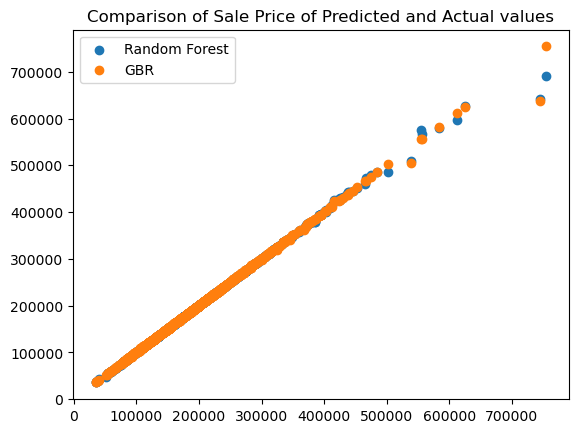

In [265]:
plt.figure()
plt.title('Comparison of Sale Price of Predicted and Actual values')
plt.scatter(Y_Train,model_RFR.predict(X_Train),label='Random Forest')
plt.scatter(Y_Train,model_GBR.predict(X_Train),label='GBR')

plt.legend()
     